# Similarity - Bigram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
df = pd.read_csv('../CSV/piosenki_bigram_pl_lem.csv', header=0)
print(df.shape)
df.head()

(186, 4341)


,abba ojciec,abraham izaak,abraham pomny,abraham potomstwo,abraham wykrzykiwać,adonai nadejść,adonai odkąd,adonai wszystek,alleluja alleluja,alleluja amen,...,żyć spragniony,żyć sławić,żyć umrzeć,żyć wiek,żyć wywyższyć,żyć zapomnieć,żyć zstępować,żyć śpiewać,żyć świat,żyła prosto
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2 = pd.read_csv('../CSV/czytania_bigram_en_lem.csv', header=0)
print(df2.shape)
df2.head()

(87, 4341)


,abba ojciec,abraham izaak,abraham pomny,abraham potomstwo,abraham wykrzykiwać,adonai nadejść,adonai odkąd,adonai wszystek,alleluja alleluja,alleluja amen,...,żyć spragniony,żyć sławić,żyć umrzeć,żyć wiek,żyć wywyższyć,żyć zapomnieć,żyć zstępować,żyć śpiewać,żyć świat,żyła prosto
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine similarity

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
sim = cosine_similarity(df, df2)

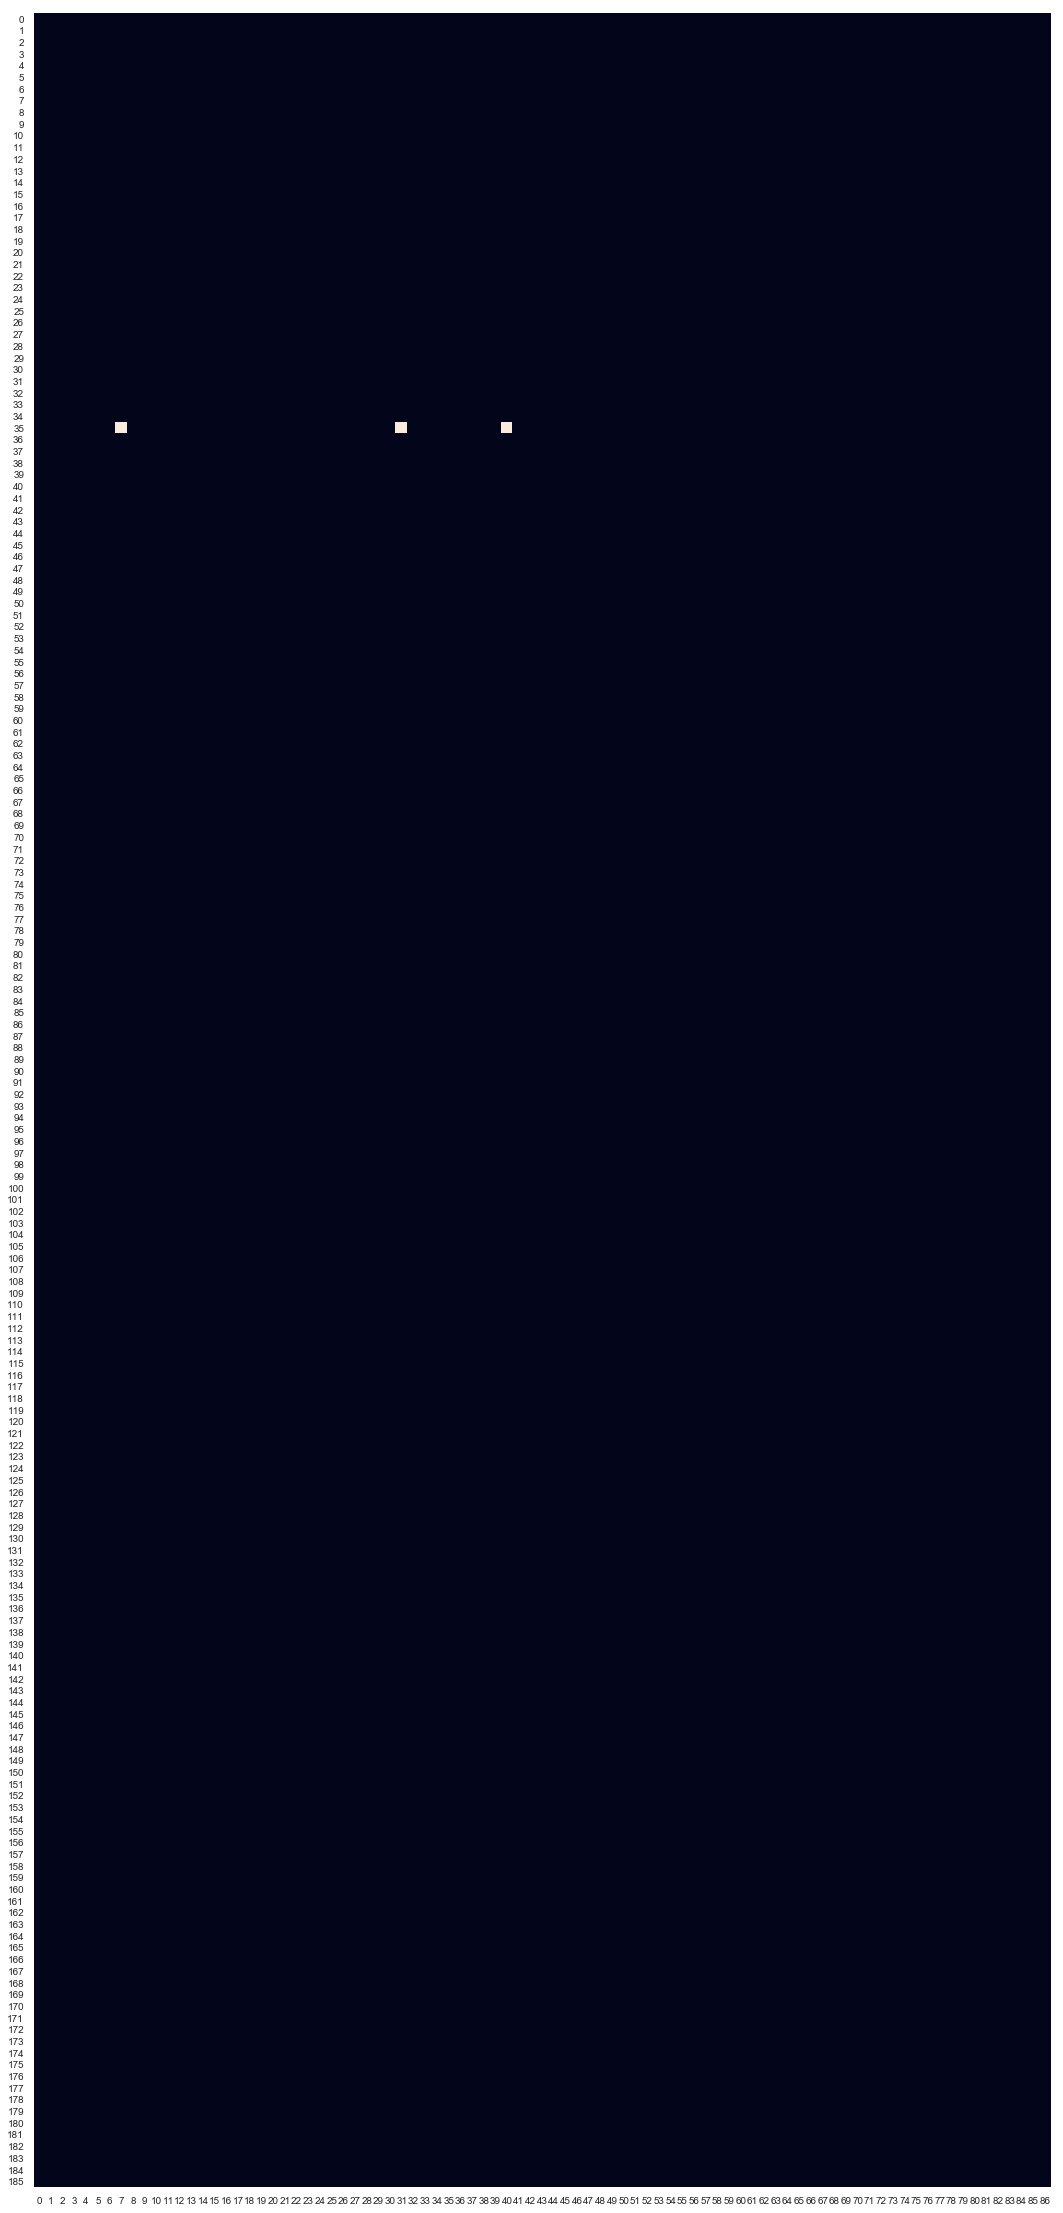

In [8]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim >= 0.5, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          #linewidths=.009
           )
plt.xticks(rotation=0) 
plt.show()

#### Check

In [15]:
df_s = pd.read_csv('../CSV/piosenki_pl_en.csv', header=0)
print(df_s.shape)
df_r = pd.read_csv('../CSV/df_eng_gospel.csv', header=0)
print(df_r.shape)

(185, 3)
(128, 2)


In [22]:
print(df_s.iloc[180]['pl'])
print()
print(df_r.iloc[38]['Ewangelia'])

 Zmartwychwstał Pan i żyje dziś  blaskiem jaśnieje noc.  Nie umrę, nie lecz będę żył  Pan okazał swą moc.  Krzyż to jest brama Pana, jeśli chcesz przez nią wejdź.  Zbliżmy się do ołtarza,  Bogu oddajmy cześć.  Dzięki składajmy Mu,  bo wielka jest Jego łaska.  Z grobu powstał dziś Pan,  a noc jest pełna blasku. Chcę dziękować Mu  i chcę Go dziś błogosławić. Jezus, mój Pan i Bóg,  On przyszedł aby nas zbawić.  Zmartwychwstał Pan i żyje dziś  blaskiem jaśnieje noc.  Nie umrę, nie lecz będę żył  Pan okazał swą moc.  Krzyż to jest brama Pana, jeśli chcesz przez nią wejdź.  Zbliżmy się do ołtarza,  Bogu oddajmy cześć.  Lepiej się uciec do Pana  niż zaufać książętom. Pan, moja moc i pieśń,  podtrzymał gdy mnie popchnięto Już nie będę się bał,  cóż może zrobić mi śmierć? Nie, nie lękam się i śpiewam chwały pieśń  Zmartwychwstał Pan i żyje dziś  blaskiem jaśnieje noc.  Nie umrę, nie lecz będę żył  Pan okazał swą moc.  Krzyż to jest brama Pana, jeśli chcesz przez nią wejdź.  Zbliżmy się do ołtar

In [15]:
df_sim = pd.DataFrame(sim)

In [16]:
df_sim.max().max()

0.8488746876271657

### Jaccard similarity

In [24]:
from scipy.spatial import distance

In [25]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [26]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(df, df2, metric = "jaccard")
# optionally convert it to a DataFrame
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


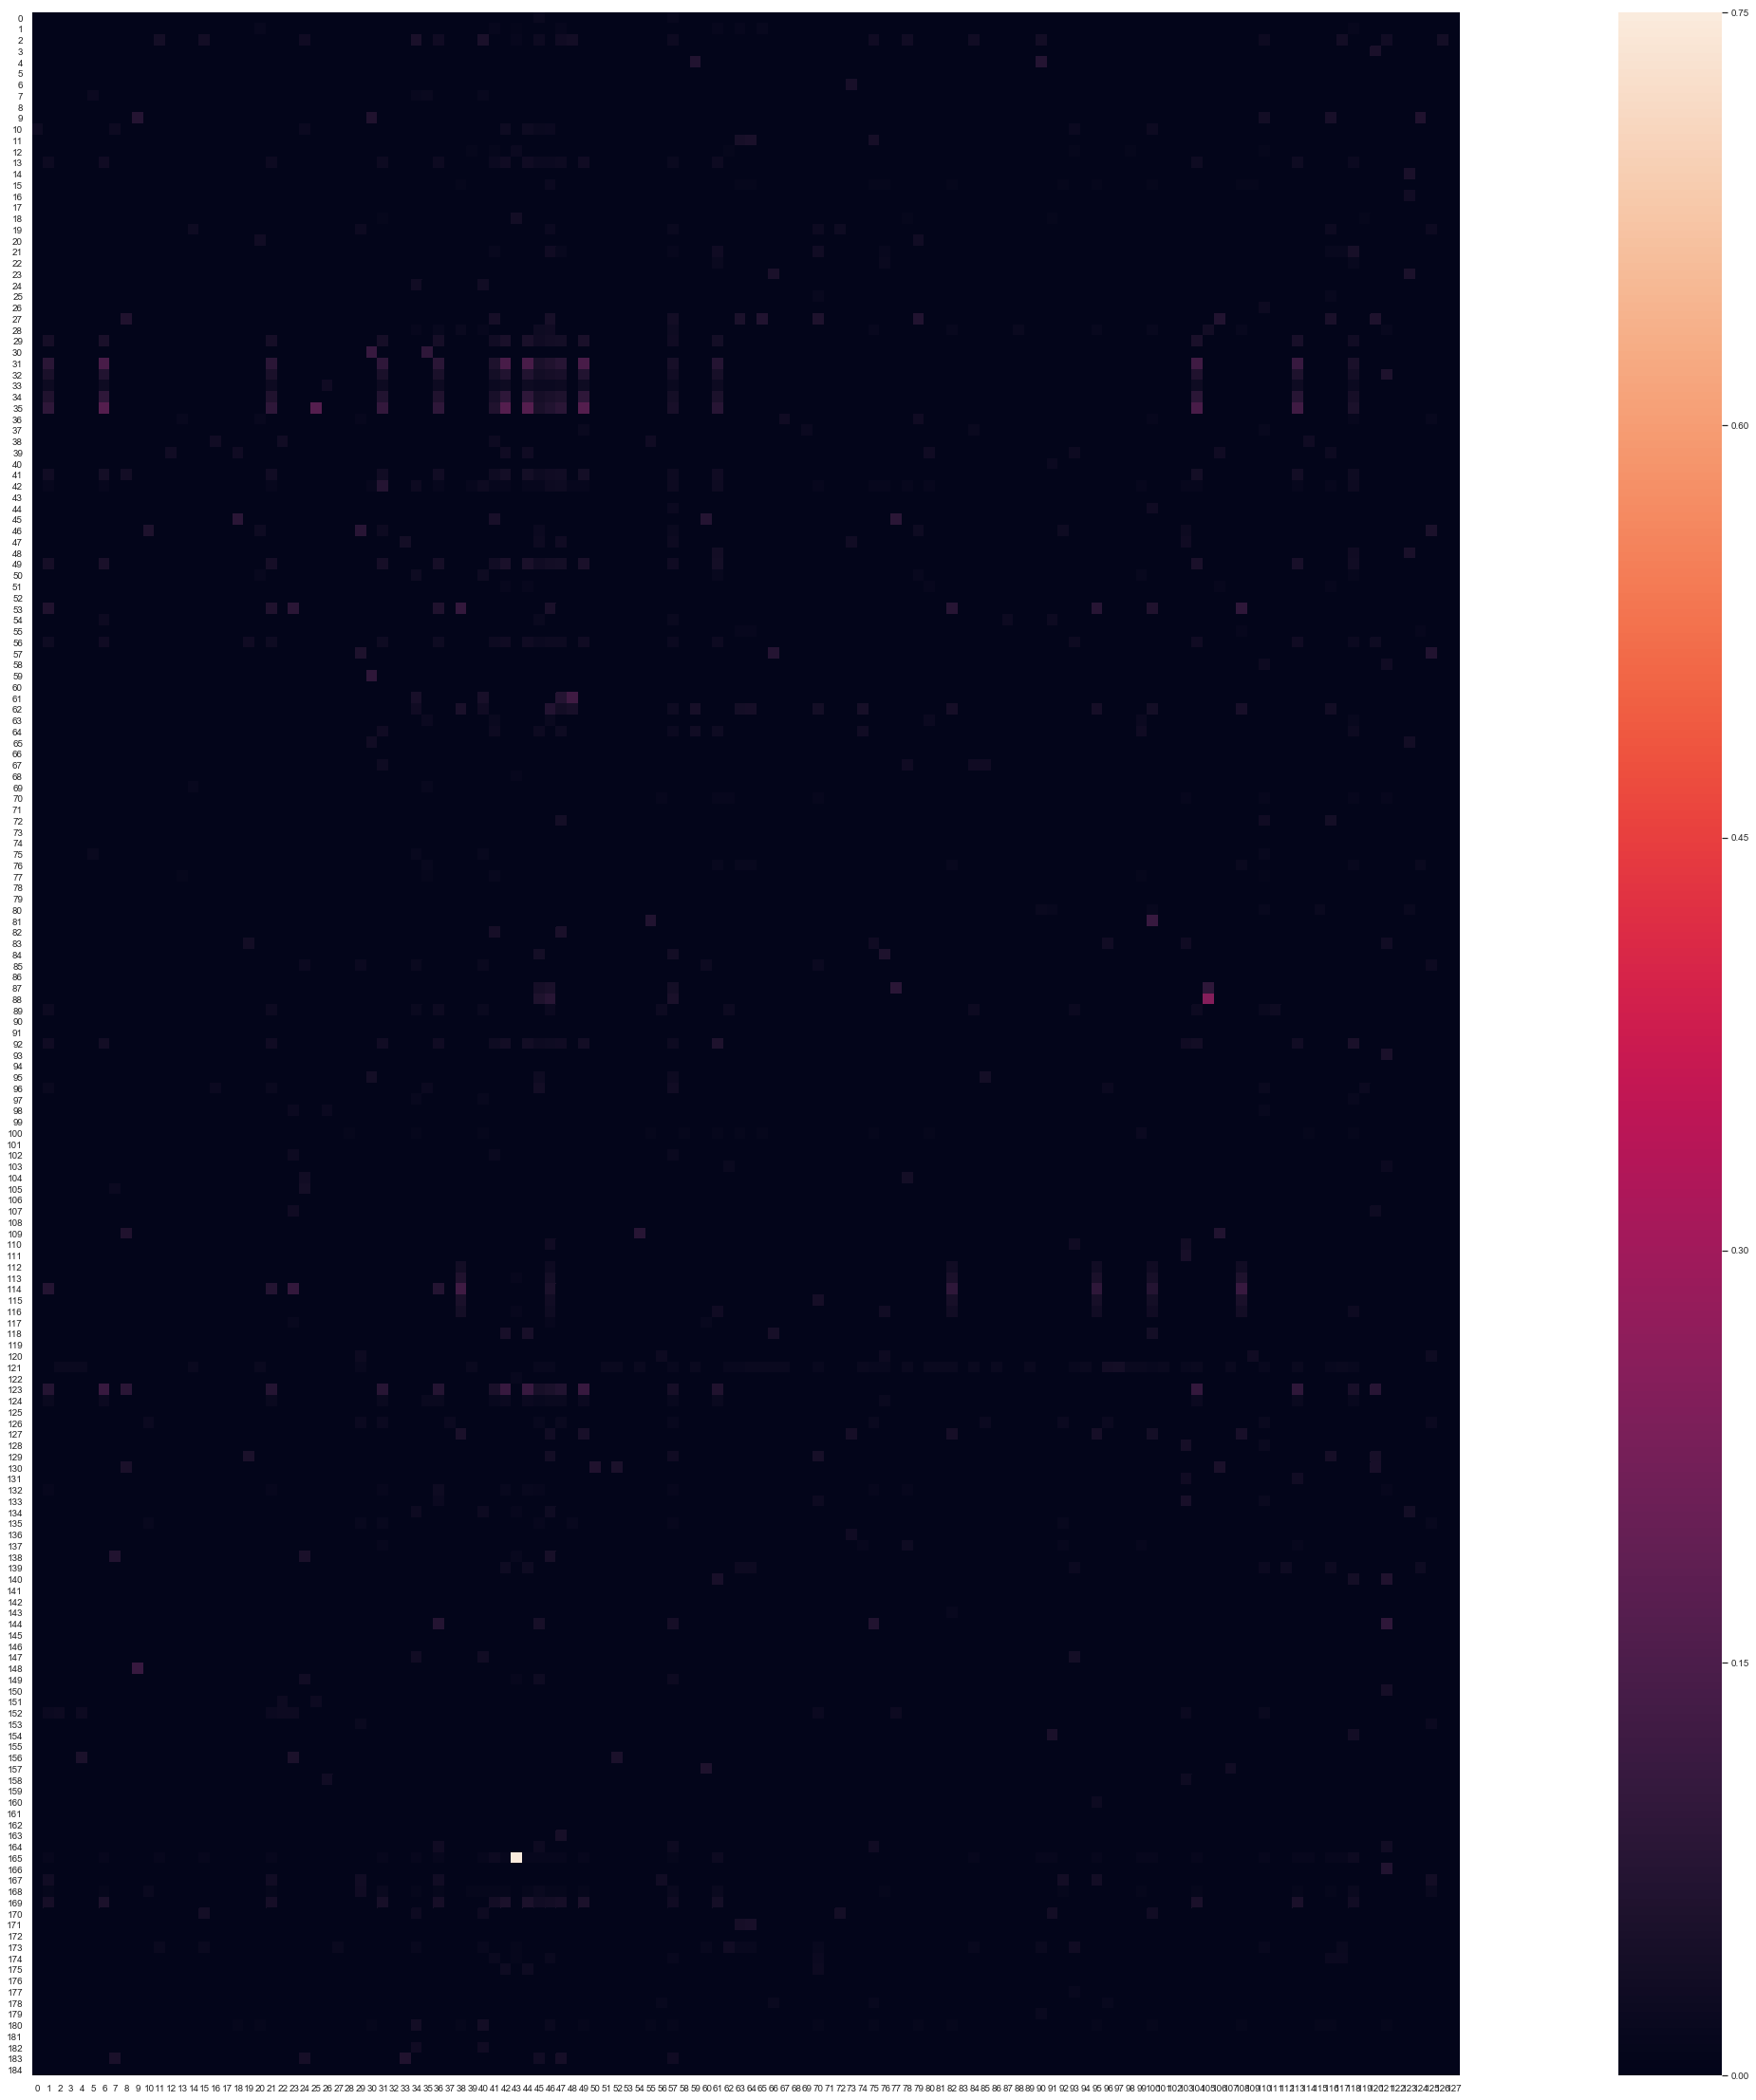

In [27]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(jac_sim, cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

#### Check

In [28]:
print(df_s.iloc[88]['en'])
print()
print(df_r.iloc[105]['Ewangelia'])

Do not be afraid to go out into the depths. Christ is with you.

When the great crowds gathered near Jesus, so that some were pushing on others, he began to speak to his disciples first: "Beware of the acid, that is, the hypocrisy of the Pharisees, for there is nothing hidden that will not be revealed or anything secret, Therefore, everything that you have said in the dark, in the light will be heard, and what in the room you whispered in your ear will be preached on the roofs. And I tell you my friends: Do not be afraid of those who kill the body, and then I can show you no more, fear him who, after killing, has the power to put him in Hell Yes, I say to you: Do not be afraid, do not they sell five sparrows for two aces? of them is not forgotten in the sight of God, and in you even the hairs are all numbered, do not be afraid: you are more important than many sparrows. "


## Other distances

In [33]:
#    From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]. These metrics support sparse matrix inputs.
#    From scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’] See the documentation for scipy.spatial.distance for details on these metrics. These metrics do not support sparse matrix inputs.

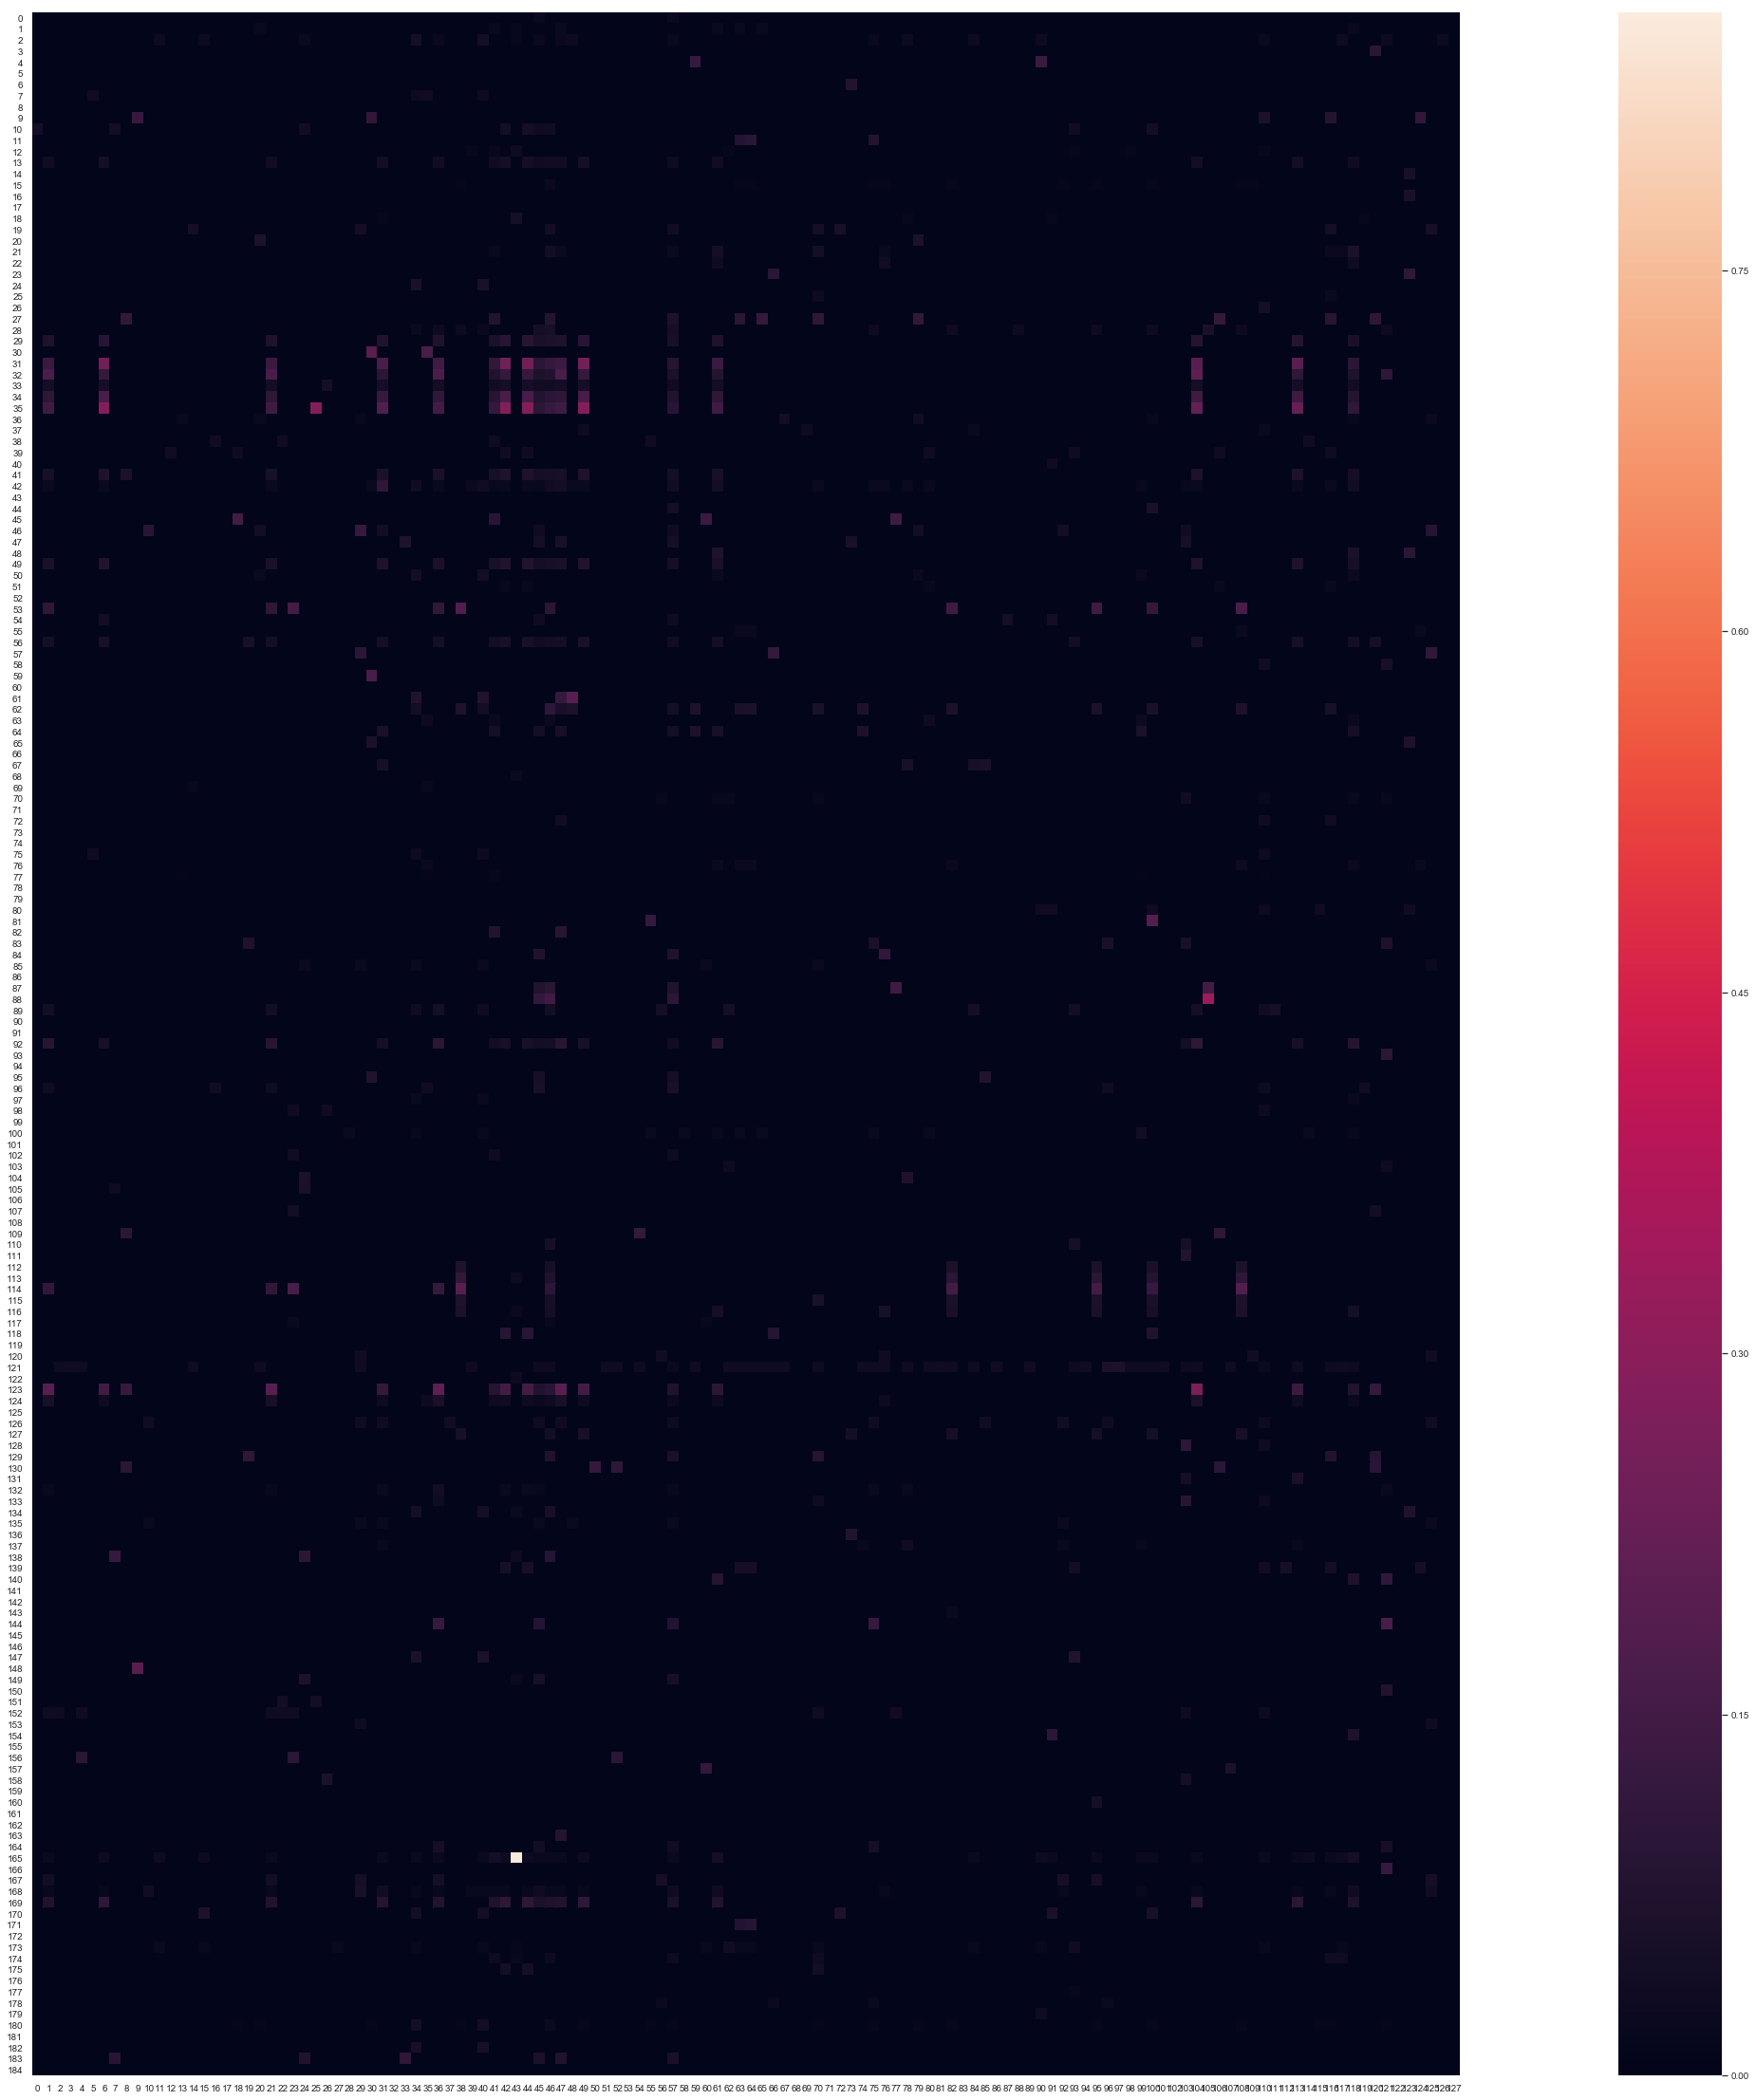

In [45]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(1 - pairwise_distances(df, df2, metric = "braycurtis"), cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

In [35]:
print(df_s.iloc[77]['en'])
print()
print(df_r.iloc[43]['Ewangelia'])

Mother, who know us, With your children, let us shine on our paths, With Your Son, go with us! Out of all women chosen - come and follow the path of the daughter of God's people - lead us to your Son. Servant humble - give peace to the world. Mother, who know us, With your children, let us shine on our paths, With Your Son, go with us! Queen of family foci - come and show the Virgin, the pattern of simplicity - lead us to Your Son. Spouse carpenter - give peace to the world. Mother, who know us, With your children, let us shine on our paths, With Your Son, go with us! Queen of our nation - come and show the oppressed hopes - lead us to your Son. A light of hungry truth - give peace to the world. Mother, who know us, With your children, let us shine on our paths, With Your Son, go with us! The comfort of the poor people - come and show the path of all joy - lead us to your Son. Mother of a tender heart - give peace to the world. Mother, who know us, With your children, let us shine on o